In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import seaborn as sns
import math
import os
plt.rcParams['figure.figsize']=[16,16]

**Exercise:** Implementing the following function, which pads all the images of a batch of examples X with zeros. Use np.pad. Note if you want to pad the array "a" of shape  (5,5,5,5,5)(5,5,5,5,5)  with `pad = 1` for the 2nd dimension, `pad = 3` for the 4th dimension and `pad = 0` for the rest, you would do:

```python
        a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))```

In [6]:
from matplotlib.image import imread
A=imread('dog.jpg')
A.shape

(384, 512, 3)

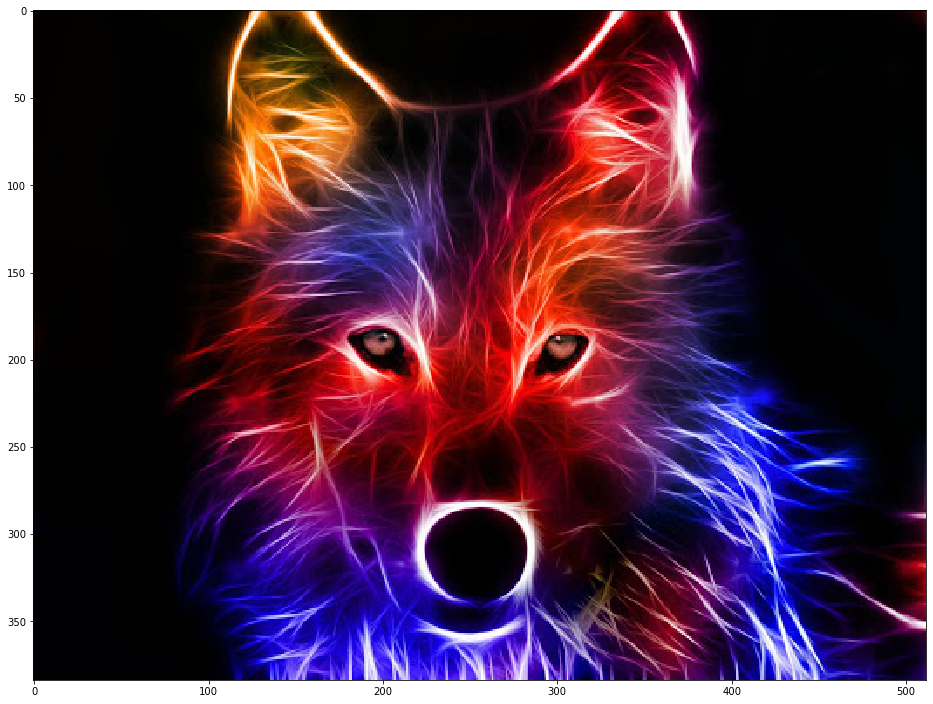

In [7]:
plt.imshow(A[:,:,:],aspect='equal')

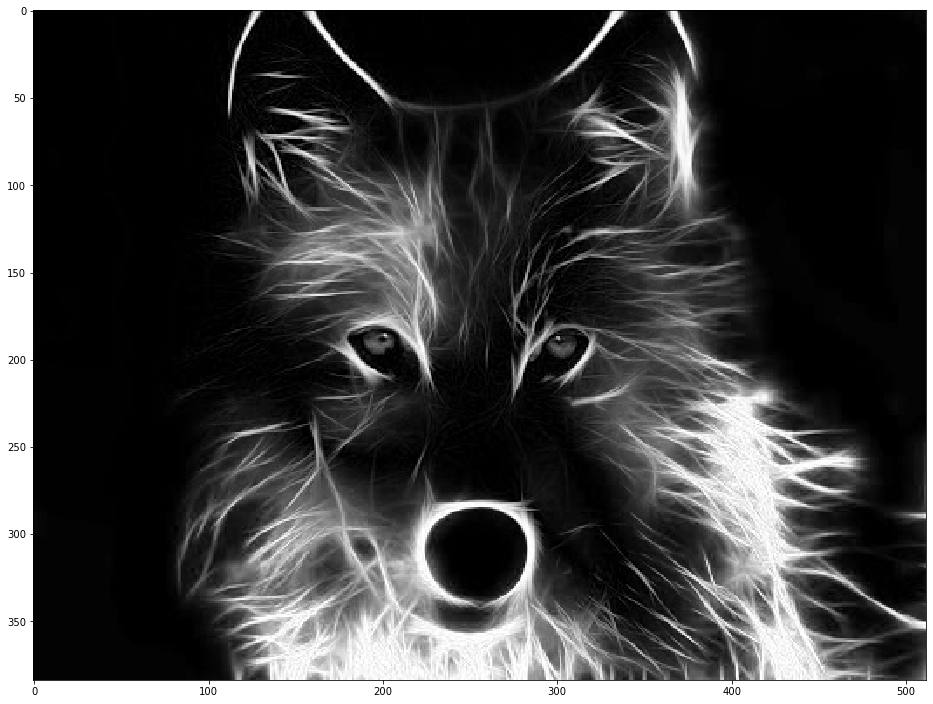

In [8]:
plt.imshow(A[:,:,2],aspect='equal')

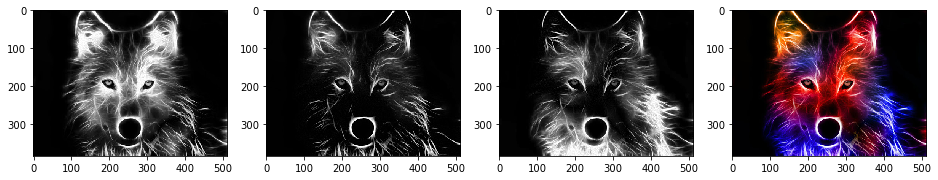

In [9]:
arr,axi=plt.subplots(1,4)
axi[0].imshow(A[:,:,0])
axi[1].imshow(A[:,:,1])
axi[2].imshow(A[:,:,2])
axi[3].imshow(A[:,:,:])
plt.show()

In [10]:
B=imread('rgb.jpg')
B.shape

(500, 600, 3)

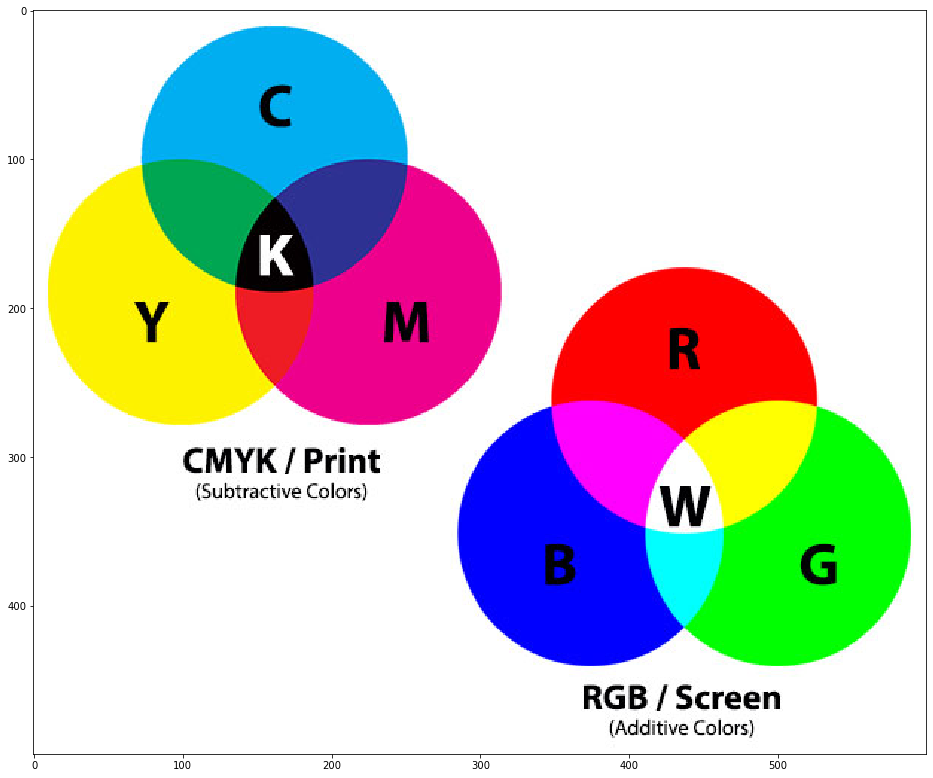

In [11]:
plt.imshow(B[:,:,:])

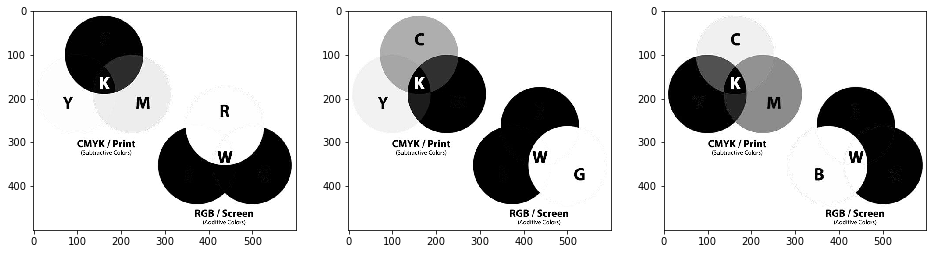

In [12]:
arr,axi=plt.subplots(1,3)
axi[0].imshow(B[:,:,0])
axi[1].imshow(B[:,:,1])
axi[2].imshow(B[:,:,2])
plt.show()

In [13]:
def zero_pad(X,pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    X_pad=np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),mode='constant',constant_values=(0,0))
    return X_pad
# Dont know about mode but constant_values implies that the padding values are zeroes(I think)    

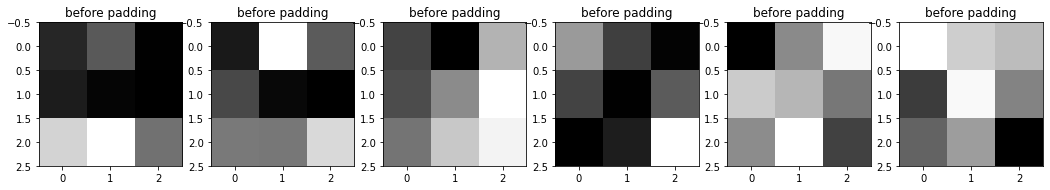

In [14]:
plt.rcParams['figure.figsize'] = (18.0, 7.0) 
x=np.random.randn(4,3,3,8)
one,two=plt.subplots(1,6)
two[0].set_title('before padding')
two[1].set_title('before padding')
two[2].set_title('before padding')
two[3].set_title('before padding')
two[4].set_title('before padding')
two[5].set_title('before padding')
two[0].imshow(x[0,:,:,1])
two[1].imshow(x[0,:,:,2])
two[2].imshow(x[0,:,:,3])
two[3].imshow(x[0,:,:,4])
two[4].imshow(x[0,:,:,5])
two[5].imshow(x[0,:,:,6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


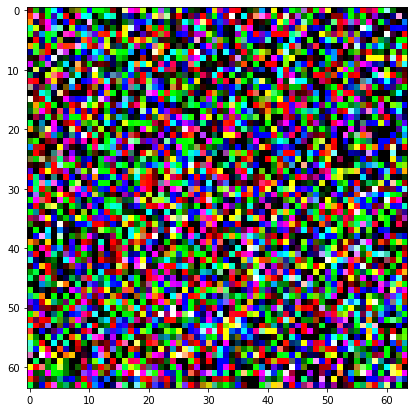

In [15]:
#This is to show the random values generated by the program in RGB colors
e=np.random.randn(4,64,64,3)
plt.imshow(e[2,:,:,:])

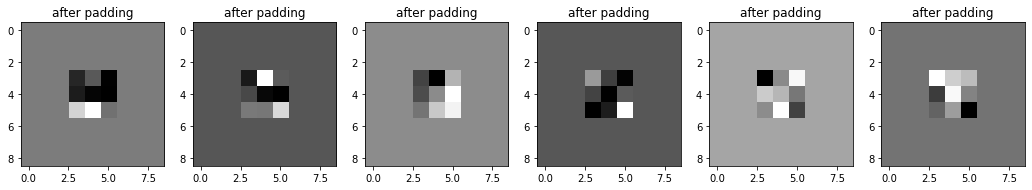

In [16]:
r=zero_pad(x,3)
one,two=plt.subplots(1,6)
two[0].set_title('after padding')
two[1].set_title('after padding')
two[2].set_title('after padding')
two[3].set_title('after padding')
two[4].set_title('after padding')
two[5].set_title('after padding')
two[0].imshow(r[0,:,:,1])
two[1].imshow(r[0,:,:,2])
two[2].imshow(r[0,:,:,3])
two[3].imshow(r[0,:,:,4])
two[4].imshow(r[0,:,:,5])
two[5].imshow(r[0,:,:,6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


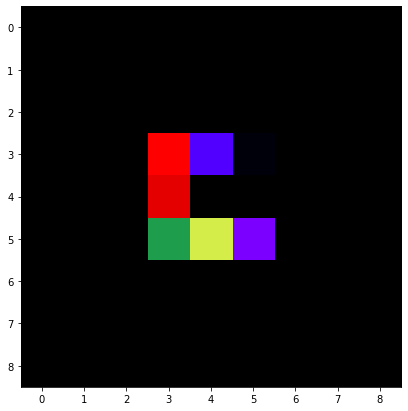

In [17]:
plt.imshow(r[0,:,:,:3])

### Why Convolutions???

Now, one of the things that you would have seen when you looked at the images is that there's a lot of wasted space in each image. While there are only 784 pixels, it will be interesting to see if there was a way that we could condense the image down to the important features that distinguish what makes it a shoe, or a handbag, or a shirt. That's where convolutions come in

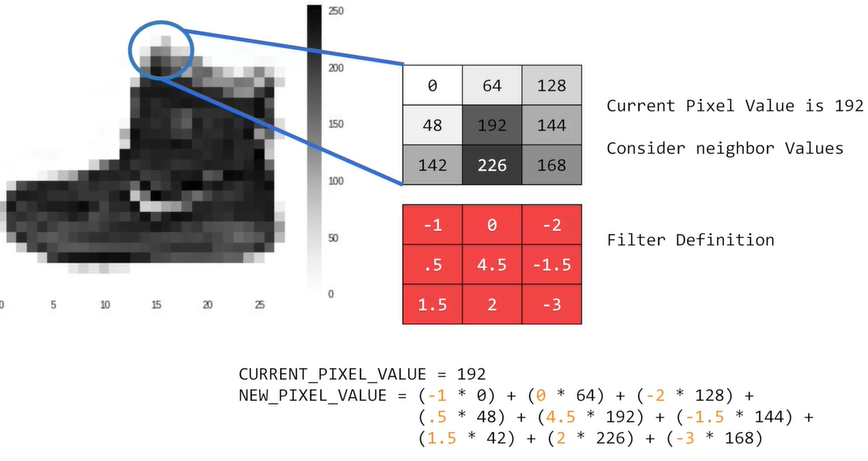

**pooling is a way of compressing an image.** <br>This will preserve the features that were highlighted by the convolution, while simultaneously quartering the size of the image. We have the horizontal and vertical axes.

So, its content has been greatly simplified, the goal being that the convolutions will filter it to the features that determine the output<br>turn your Deep Neural Network into a Convolutional Neural Network by adding convolutional layers on top, and having the network train against the results of the convolutions instead of the raw pixels.

In [18]:
#a_single_prev matrix is of size (f,f,n_c)
def conv_single_step(a_single_prev,W,b):
    s=np.multiply(a_single_prev,W)
    Z=np.sum(s)
    Z=Z+b
    return float(Z)

In [19]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3) 
#The weights should be same for all the layers(RGB) because we cant apply different convolutions on different layers i.e finding  
#different kind of edges for different layers
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


### 3.3 - Convolutional Neural Networks - Forward pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume: 

<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

**Exercise**: 
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs); 
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias. 

Finally you also have access to the hyperparameters dictionary which contains the stride and the padding. 

**Hint**: 
1. To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
Notice how this gives a 3D slice that has height 2, width 2, and depth 3.  Depth is the number of channels.  
This will be useful when you will define `a_slice_prev` below, using the `start/end` indexes you will define.
2. To define a_slice you will need to first define its corners `vert_start`, `vert_end`, `horiz_start` and `horiz_end`. This figure may be helpful for you to find out how each of the corner can be defined using h, w, f and s in the code below.

<img src="images/vert_horiz_kiank.png" style="width:400px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 3** </u><font color='purple'>  : **Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)** <br> This figure shows only a single channel.  </center></caption>


**Reminder**:
The formulas relating the output shape of the convolution to the input shape is:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

For this exercise, we won't worry about vectorization, and will just implement everything with for-loops.

In [20]:
a=np.random.randn(5,128,128,3)

In [21]:
a[...,0]

array([[[ 0.04359686, -0.44712856,  0.59357852, ..., -0.19899818,
         -0.47918492,  0.45112294],
        [-1.11487105,  1.46089238,  1.70459417, ...,  1.00568668,
         -0.34898419,  0.49056104],
        [-0.3692559 ,  0.44509671, -1.71116766, ...,  0.20835292,
         -0.74617371, -1.26885896],
        ...,
        [ 1.23396099,  2.00752804, -0.05979987, ..., -0.41978961,
          0.01087322,  0.73384469],
        [ 0.8151836 , -1.25549477,  0.5032941 , ..., -2.5198995 ,
         -0.72420961, -0.20077992],
        [-0.63640365, -0.45648846,  0.70725079, ...,  0.36935207,
         -0.26573597,  1.90731607]],

       [[ 0.227887  ,  0.50779561,  0.07023654, ...,  0.3535914 ,
          0.23989968,  0.51471339],
        [ 0.39502062,  0.33338511,  1.2013328 , ...,  0.45878879,
         -0.35102058, -1.94539168],
        [ 0.64602822,  0.69369615,  1.78028849, ..., -1.01198389,
          1.27768571,  1.66971741],
        ...,
        [ 0.36052029, -0.24199893,  1.0655655 , ...,  

In [22]:
def conv_one_layer(A_prev,W,b,hparameters):
    #first thing to do is padding all the samples
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    pad=hparameters["pad"]
    A_pad=zero_pad(A_prev,pad)
    stride=hparameters["stride"]
    # The shape of the 
    n_H=int((n_H_prev-f+2*pad)/stride)+1
    #I thought n_H and n_W will be same, took lot of time for debugging
    n_W=int((n_W_prev-f+2*pad)/stride)+1
    #instead of n_W_prev i have written n_H_prev in above statement
    
    Z=np.zeros((m,n_H,n_W,n_C))
    for i in range(m):
        current_A=A_pad[i,:,:,:]
        for h in range(n_H):  #remember this thing
            vertical_conv=h*stride
            vertical_end=vertical_conv+f
            for w in range(n_W):
                horiz_conv=w*stride
                horiz_end=horiz_conv+f
                for c in range(n_C):
                    A_slice=current_A[vertical_conv:vertical_end,horiz_conv:horiz_end,:]
                    Z[i,h,w,c]=conv_single_step(A_slice,W[:,:,:,c],b[:,:,:,c])
    assert(Z.shape==(10,3,4,8)) ## Its strongly advised to write this assert statement it will make debugging lot faster and 
    # also remember to write numerical values in shape instead of using variables directly.
    #99 percent errors lies in shape in deep learning
    cache = (A_prev, W, b, hparameters)
    
    return Z,cache                     

In [23]:
def conv_one_layer(A,W,b,hparameters):
    #first thing to do is padding all the samples
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    pad=hparameters["pad"]
    A_pad=zero_pad(A,pad)
    stride=hparameters["stride"]
    # The shape of the 
    n_H=int((n_H_prev-f+2*pad)/stride)+1
    #I thought n_H and n_W will be same took lot of time for debugging
    n_W=int((n_W_prev-f+2*pad)/stride)+1
    #instead of n_W_prev i have written n_H_prev in above statement
    
    Z=np.zeros((m,n_H,n_W,n_C))
    for i in range(m):
        current_A=A_pad[i,:,:,:]
        for h in range(n_H):  #remember this thing
            vertical_conv=h*stride
            vertical_end=vertical_conv+f
            for w in range(n_W):
                horiz_conv=w*stride
                horiz_end=horiz_conv+f
                for c in range(n_C):
                    A_slice=current_A[vertical_conv:vertical_end,horiz_conv:horiz_end,:]
                    Z[i,h,w,c]=conv_single_step(A_slice,W[:,:,:,c],b[:,:,:,c])
    assert(Z.shape==(10,3,4,8)) ## Its strongly advised to write this assert statement it will make debugging lot faster and 
    # also remember to write numerical values in shape instead of using variables directly.
    #99 percent errors lies in shape in deep learning
    cache = (A, W, b, hparameters)
    
    return Z,cache                   

In [24]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z,cache = conv_one_layer(A_prev, W, b, hparameters)
print(Z.shape)

print("Z's mean =\n", np.mean(Z))  ## Mean is the best way to cehck whether all values are correct sometimes even when shape is
#correct and result may be closer but to confirm all the inside values are correct or not, mean is the best way to confirm
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache[0][1][2][3] =\n", cache[0][1][2][3])


(10, 3, 4, 8)
Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


## Model Building Using Tensorflow

In [25]:
## Doing the same assignment with tensorflow
import tensorflow as tf

In [26]:
import math
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [27]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [28]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

OSError: Unable to open file (unable to open file: name = 'datasets/train_signs.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Example of a picture
index = 14
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
Y_train_orig.reshape(-1).shape

In [ ]:
np.eye(5)

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

In [ ]:
Y_train

In [ ]:
a=np.random.randn(1,10)*10/2

In [ ]:
def convert_to_int(X):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if(X[i][j]<0):
                X[i][j]*=-1
            X[i][j]=int(X[i][j])
    return X

In [ ]:
a=convert_to_int(a)

In [ ]:
a

In [ ]:
def convert_to_one_hot(Y, C):  #Smart way to one hot encode
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
S=np.arange(9).reshape(3,3)
S.reshape(-1)

In [ ]:
print(Y_train_orig)
convert_to_one_hot(Y_train_orig,6)

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

In [ ]:
Y_train

In [ ]:
tf.placeholder(tf.float32,[3,1])

In [ ]:
coefficients=np.array([[1.],[-10.],[25.]])
coefficients.shape

In [ ]:
coefficients=np.array([[1.],[-10.],[25.]])

w=tf.Variable(0,dtype=tf.float32)
x=tf.placeholder(tf.float32,[3,1])
#cost=tf.add(tf.add(w**2,tf.multiply(-10.,w)),25)
cost=x[0][0]*w**2+x[1][0]*w+x[2][0]
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init=tf.global_variables_initializer()
session=tf.Session()
session.run(init)
print(session.run(w))

In [ ]:
session.run(train,feed_dict={x:coefficients})
print(session.run(w))

In [ ]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init=tf.global_variables_initializer()
for i in range(10000):
    session.run(train,feed_dict={x:coefficients})
print(session.run(w))

In [ ]:
def placeholder(nH,nW,nC,nY):
    X=tf.placeholder(tf.float32,[None,nH,nW,nC])
    Y=tf.placeholder(tf.float32,[None,nY])
    return X,Y

In [ ]:
X, Y = placeholder(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

In [ ]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32,[None,n_H0,n_W0,n_C0])
    Y = tf.placeholder(tf.float32,[None,n_y])    
    return X, Y

In [ ]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

In [ ]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1",[4,4,3,8],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2",[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters = {"W1": W1,
                  "W2": W2}
    return parameters

In [ ]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
    print("W1.shape: " + str(parameters["W1"].shape))
    print("\n")
    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
    print("W2.shape: " + str(parameters["W2"].shape))

In [ ]:
def forward_propagation(X,parameters):
    W1=parameters["W1"]
    W2=parameters["W2"]
    Z1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')
    A1=tf.nn.relu(Z1)
    P1=tf.nn.max_pool(A1,ksize=[1,8,8,1],strides=[1,8,8,1],padding='SAME')
    Z2=tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding='SAME')
    A2=tf.nn.relu(Z2)
    P2=tf.nn.max_pool(A2,ksize=[1,4,4,1],strides=[1,4,4,1],padding='SAME')
    F=tf.contrib.layers.flatten(P2)
    Z3=tf.contrib.layers.fully_connected(F,6,activation_fn=None)
    return Z3

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = \n" + str(a))

In [ ]:
def compute_cost(Z3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    return cost

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.009,
          num_epochs=100, minibatch_size=64, print_cost=True):   
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = [] 
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)                
        return train_accuracy, test_accuracy, parameters

In [ ]:
def model(X_train, Y_train, X_test, Y_test,learning_rate=0.009,total_epoch=100,minibatch_size=64):
    ops.reset_default_graph()  
    tf.set_random_seed(1)
    seed=3
    (m,nH,nW,nC)=X_train.shape
    n_y=Y_train.shape[1]
    costs=[]
    X,Y=create_placeholders(nH,nW,nC,n_y)
    parameter=initialize_parameters()
    Z3=forward_propagation(X,parameter)
    cost=compute_cost(Z3,Y)
    optimizer=tf.train. (learning_rate=learning_rate).minimize(cost)
    init=tf.global_variables_initializer()
    session=tf.Session()
    session.run(init)
    for epoch in range(total_epoch):
        minibatch_cost=0
        total_mBatches=int(m/minibatch_size)
        seed=seed+1
        minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
        for minibatch in minibatches:
            (minibatch_X,minibatch_Y)=minibatch
            _,temp_cost=session.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
            minibatch_cost+=temp_cost
        if epoch%5==0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
        if epoch%1==0:
            costs.append(minibatch_cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    return train_accuracy, test_accuracy, parameter

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

In [ ]:
tf.reset_default_graph()
session=tf.Session()
X,Y=create_placeholders()